In [2]:
from nptdms import TdmsFile as TF
import numpy as np
import pandas as pd
import datetime
import matplotlib as mplt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
run1 = TF('Z:\Test Data\Raw Data\Materials Testing\\2018-05-21\Run 1_together.tdms')

In [3]:
run2 = TF('D:\\Data\\DiscsPrelim\\HeatMapping\\Run2_Together.tdms')

In [5]:
f = run1.object('Sensors').as_dataframe()
f['motor'] = run1.object('Motors', 'Motor B').data
time = run1.object('Global', 'Time').data
t = time[0]
f.index = [(i-t).total_seconds() for i in time]

In [59]:
s = run2.object('Sensors').as_dataframe()
s['motor'] = run2.object('Motors', 'Motor B').data
time = run2.object('Global', 'Time').data
t = time[0]
s.index = [(i-t).total_seconds() for i in time]

In [7]:
f['motor'] = f['motor'] - min(f['motor'])
#s['motor'] = s['motor'] - min(s['motor'])

In [12]:
f.index

Float64Index([        0.0,    0.272999,    0.528999,    0.780999,       1.033,
                 1.284999,    1.536999,       1.789,    2.040999,    2.292999,
              ...
              4504.438999,    4504.703, 4504.957999,     4505.21, 4505.461999,
              4505.713999,    4505.967, 4506.218999, 4506.470999,    4506.723],
             dtype='float64', length=17770)

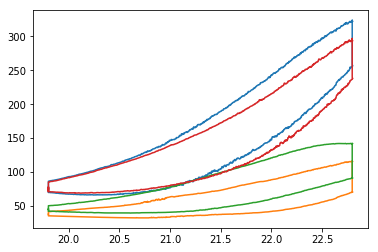

In [24]:
plt.plot(f['motor'].iloc[7700:12000], f['T_par_1'].iloc[7700:12000])
plt.plot(f['motor'].iloc[7700:12000], f['T_par_2'].iloc[7700:12000])
plt.plot(f['motor'].iloc[7700:12000], f['T_per_1'].iloc[7700:12000])
plt.plot(f['motor'].iloc[7700:12000], f['T_per_2'].iloc[7700:12000])

In [8]:
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('dT/dt (C/s)')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('dx/dt (mm/s)')
    return ax1, ax2
f1 = np.gradient(f['Temperature'], f.index)
f2 = np.gradient(f['motor'], f.index)
# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, f.index, f1, f2, 'r', 'b')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.title('Temperature and Motor Differentials')
ax2.set_ylim(-.03,.03)
ax1.set_ylim(-3, 3)
plt.xlim(730)
plt.show()

KeyError: 'Temperature'

(-0.03, 0.03)

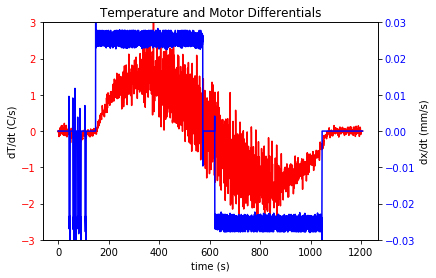

In [62]:
s1 = np.gradient(s['Temperature'], s.index)
s2 = np.gradient(s['motor'], s.index)


fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, s.index, s1, s2, 'r', 'b')
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.title('Temperature and Motor Differentials')
#plt.xlim(300)
ax1.set_ylim(-3,3)
ax2.set_ylim(-.03,.03)

Text(0.5,1,'Temperature Map')

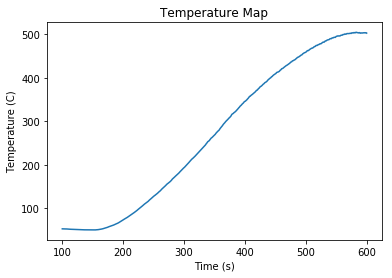

In [63]:
plt.plot(s['Temperature'][100:600])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.title('Temperature Map')

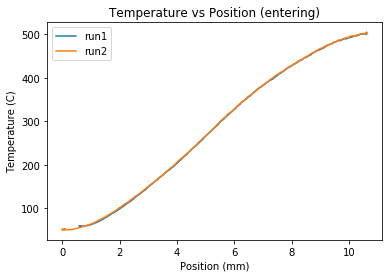

In [64]:
plt.plot(f['motor'][700:1180], f['Temperature'][700:1180], label = 'run1')
plt.plot(s['motor'][100:600], s['Temperature'][100:600], label = 'run2')
plt.xlabel('Position (mm)')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs Position (entering)')
plt.legend()

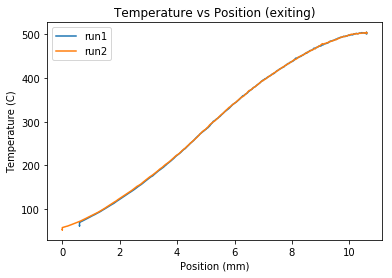

In [65]:
plt.plot(f['motor'][1180:], f['Temperature'][1180:], label = 'run1')
plt.plot(s['motor'][600:], s['Temperature'][600:], label = 'run2')
plt.xlabel('Position (mm)')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs Position (exiting)')
plt.legend()

In [66]:
p1 = np.polyfit(f['motor'][700:1180],f['Temperature'][700:1180], 4)
p2 = np.polyfit(s['motor'][100:600], s['Temperature'][100:600], 4)

In [67]:
print(p1,p2)

[  3.99534442e-02  -1.51804338e+00   1.60676967e+01  -5.20967160e+00
   5.61632354e+01] [  3.07484951e-02  -1.28248994e+00   1.40205526e+01   1.56558179e+00
   5.08123062e+01]


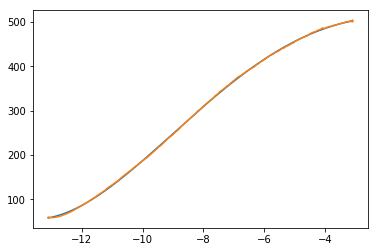

In [38]:
plt.plot(f['motor'][700:1180], np.polyval(p1, f['motor'][700:1180]))
plt.plot(f['motor'][700:1180], f['Temperature'][700:1180])

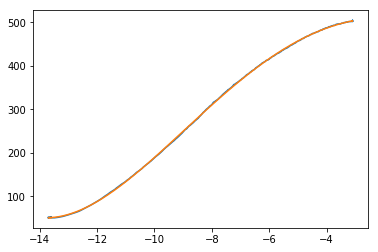

In [40]:
plt.plot(s['motor'][100:600], s['Temperature'][100:600])
plt.plot(s['motor'][100:600], np.polyval(p2, s['motor'][100:600]))

Text(0,0.5,'Temp. (C/s)')

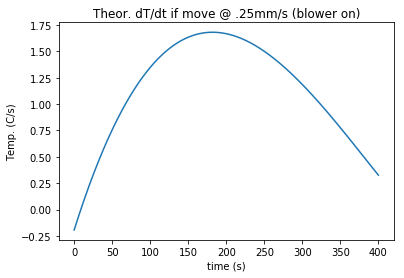

In [42]:
x = np.linspace(-14,-3,1000)
t = np.linspace(0,400,1000)
#plt.plot(t,x)
plt.plot(t, np.gradient(np.polyval(p2,x),t))
plt.title('Theor. dT/dt if move @ .25mm/s (blower on)')
plt.xlabel('time (s)')
plt.ylabel('Temp. (C/s)')

Text(0,0.5,'Temp. (C/s)')

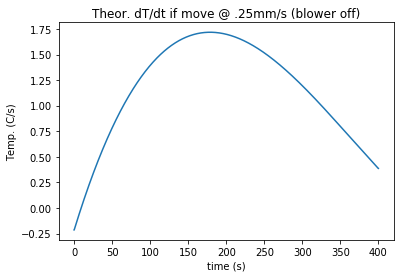

In [231]:
x = np.linspace(0,10,1000)
t = np.linspace(0,400,1000)
#plt.plot(t,x)
plt.plot(t, np.gradient(np.polyval(p1,x),t))
plt.title('Theor. dT/dt if move @ .25mm/s (blower off)')
plt.xlabel('time (s)')
plt.ylabel('Temp. (C/s)')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1772: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1773: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1773: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1774: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1774: RuntimeWarning: invalid value encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1780: RuntimeWarning: invalid value encountered in add
  out[slice1] = a * f[slice2] + b * f[slice3] +

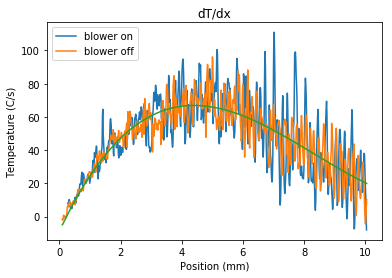

In [219]:
plt.plot(b['motor'][160:], np.gradient(b['Temperature'][160:],b['motor'][160:]), label = 'blower on')
plt.plot(nb['motor'][400:], np.gradient(nb['Temperature'][400:],nb['motor'][400:]), label = 'blower off')
plt.plot(nb['motor'][400:], np.gradient(np.polyval(p2, nb['motor'][400:]), nb['motor'][400:]))
plt.xlabel('Position (mm)')
plt.ylabel('Temperature (C/s)')
plt.title('dT/dx')
plt.legend()

In [72]:
p11, p22 = [[  0.05337484,  -1.9288045,   19.46653895,  -8.77899769,  48.71733467],[6.06002798e-02,  -2.01424870e+00,   1.95526002e+01,  -8.82140717e+00,
   6.14781560e+01]]

Text(0.5,1,'Temperature Map Polynomials at different velocities')

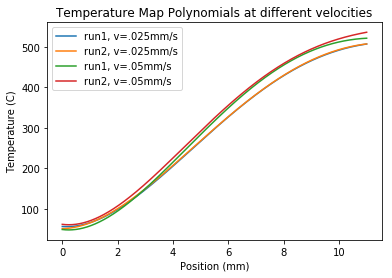

In [80]:
x = np.linspace(0,11,1000)
plt.plot(x, np.polyval(p1,x), label = 'run1, v=.025mm/s')
plt.plot(x, np.polyval(p2,x), label = 'run2, v=.025mm/s')
plt.plot(x, np.polyval(p11,x), label = 'run1, v=.05mm/s')
plt.plot(x, np.polyval(p22,x), label = 'run2, v=.05mm/s')
plt.legend()
plt.xlabel('Position (mm)')
plt.ylabel('Temperature (C)')
plt.title('Temperature Map Polynomials at different velocities')

In [75]:
p11

[0.05337484, -1.9288045, 19.46653895, -8.77899769, 48.71733467]